In [1]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.unet import U_Net
from train import UnetTrainer

%matplotlib inline

In [2]:
# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [3]:
# Location of model weights (needed for demo)
weights_dir = f'weights/unet-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

print(os.path.isdir(weights_dir))
print(os.path.isfile(weights_file))

True
False


# Dataset

In [4]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [5]:
# repeat iterating over training image indefinitely
train_ds = div2k_train.dataset(batch_size=16, random_transform=True, repeat_count=None)

# 1 epoch
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1) #

# Training

In [6]:
trainer = UnetTrainer(model=U_Net(layer_depth=4, filters_orig=32, kernel_size=4, batch_norm=True), 
                      checkpoint_dir=f'.ckpt/U_Net-x{scale}')

In [7]:
# Train EDSR model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

1000/300000: loss = 51.358, PSNR = 14.060443 (1509.93s)
2000/300000: loss = 42.496, PSNR = 15.099096 (1534.80s)
3000/300000: loss = 39.631, PSNR = 15.432777 (1554.05s)
4000/300000: loss = 38.458, PSNR = 15.477801 (1546.49s)
5000/300000: loss = 38.111, PSNR = 15.476151 (1540.29s)
6000/300000: loss = 37.874, PSNR = 15.544523 (1542.50s)
7000/300000: loss = 37.411, PSNR = 15.543284 (1538.60s)
8000/300000: loss = 37.427, PSNR = 15.574176 (1545.38s)
9000/300000: loss = 37.257, PSNR = 15.566549 (1553.47s)
10000/300000: loss = 37.214, PSNR = 15.592606 (1542.17s)
11000/300000: loss = 36.941, PSNR = 15.619398 (1532.80s)
12000/300000: loss = 36.857, PSNR = 15.558171 (1531.79s)
13000/300000: loss = 36.725, PSNR = 15.612332 (1540.68s)
14000/300000: loss = 36.424, PSNR = 15.597232 (1536.85s)
15000/300000: loss = 36.426, PSNR = 15.640948 (1537.28s)
16000/300000: loss = 36.516, PSNR = 15.628798 (1528.94s)
17000/300000: loss = 36.511, PSNR = 15.637286 (1532.40s)
18000/300000: loss = 36.128, PSNR = 15.6

145000/300000: loss = 35.021, PSNR = 15.695694 (1530.40s)
146000/300000: loss = 35.061, PSNR = 15.695020 (1552.77s)
147000/300000: loss = 34.961, PSNR = 15.693594 (1527.93s)
148000/300000: loss = 35.044, PSNR = 15.697757 (1522.68s)
149000/300000: loss = 34.834, PSNR = 15.697789 (1523.33s)
150000/300000: loss = 34.916, PSNR = 15.690289 (1529.57s)
151000/300000: loss = 34.941, PSNR = 15.693939 (1524.26s)
152000/300000: loss = 35.065, PSNR = 15.687100 (1529.53s)
153000/300000: loss = 35.007, PSNR = 15.697162 (1532.98s)
154000/300000: loss = 34.822, PSNR = 15.693715 (1528.01s)
155000/300000: loss = 34.881, PSNR = 15.693479 (1529.34s)
156000/300000: loss = 34.787, PSNR = 15.693253 (1527.23s)
157000/300000: loss = 34.899, PSNR = 15.696388 (1528.61s)
158000/300000: loss = 34.808, PSNR = 15.694082 (1524.30s)
159000/300000: loss = 34.903, PSNR = 15.699384 (1531.42s)
160000/300000: loss = 35.004, PSNR = 15.695883 (1529.59s)
161000/300000: loss = 34.896, PSNR = 15.695719 (1531.37s)
162000/300000:

287000/300000: loss = 34.500, PSNR = 15.705290 (1528.10s)
288000/300000: loss = 34.998, PSNR = 15.704865 (1529.56s)
289000/300000: loss = 34.656, PSNR = 15.703339 (1526.11s)
290000/300000: loss = 34.666, PSNR = 15.704562 (1529.41s)
291000/300000: loss = 34.665, PSNR = 15.702438 (1545.30s)
292000/300000: loss = 34.809, PSNR = 15.703837 (1528.65s)
293000/300000: loss = 34.678, PSNR = 15.705358 (1528.84s)
294000/300000: loss = 34.496, PSNR = 15.703501 (1527.14s)
295000/300000: loss = 34.801, PSNR = 15.705801 (1530.69s)
296000/300000: loss = 34.664, PSNR = 15.703161 (1528.11s)
297000/300000: loss = 34.521, PSNR = 15.704153 (1528.76s)
298000/300000: loss = 34.719, PSNR = 15.702139 (1529.26s)
299000/300000: loss = 34.820, PSNR = 15.703833 (1521.18s)
300000/300000: loss = 34.838, PSNR = 15.704996 (1527.27s)


In [8]:
# Restore from checkpoint with highest PSNR
trainer.restore()

Model restored from checkpoint at step 282000.


In [9]:
# Evaluate model on full validation set
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

PSNR = 15.246491


In [10]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

# Demo

In [12]:
model = U_Net(kernel_size = 4, filters_orig=32, layer_depth=4)
model.load_weights(weights_file)

In [15]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

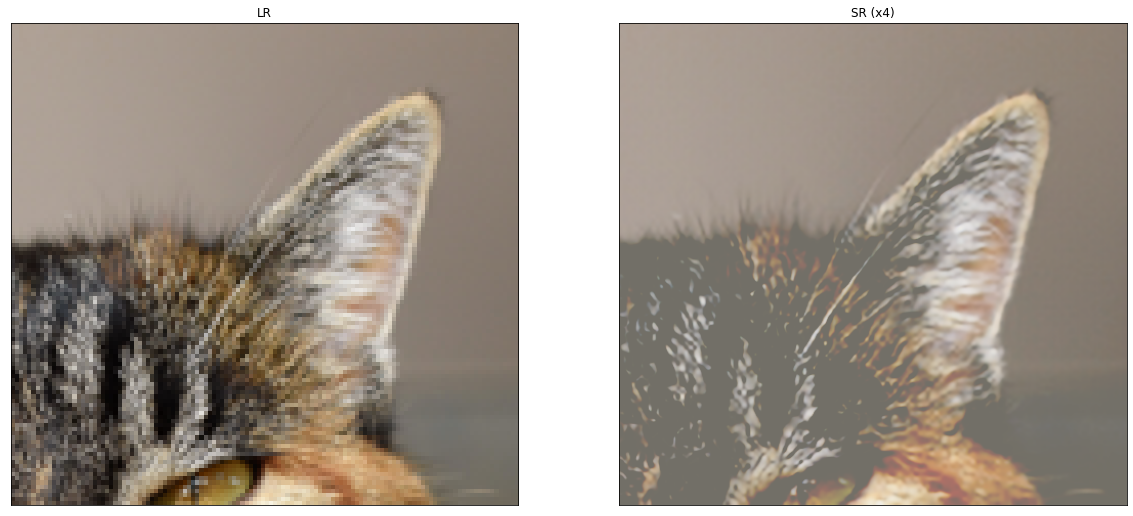

In [16]:
resolve_and_plot('demo/0869x4-crop.png')

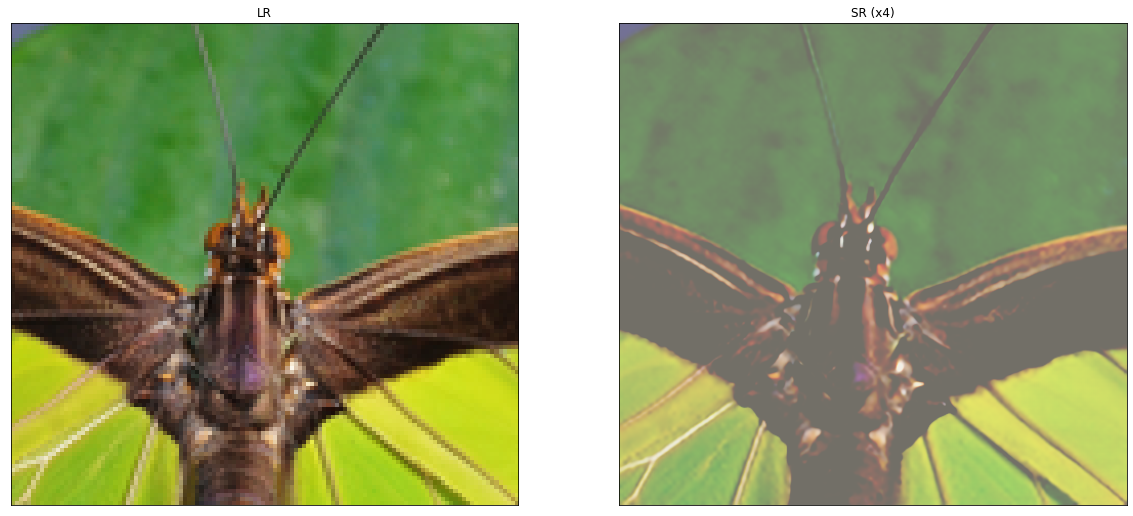

In [17]:
resolve_and_plot('demo/0829x4-crop.png')

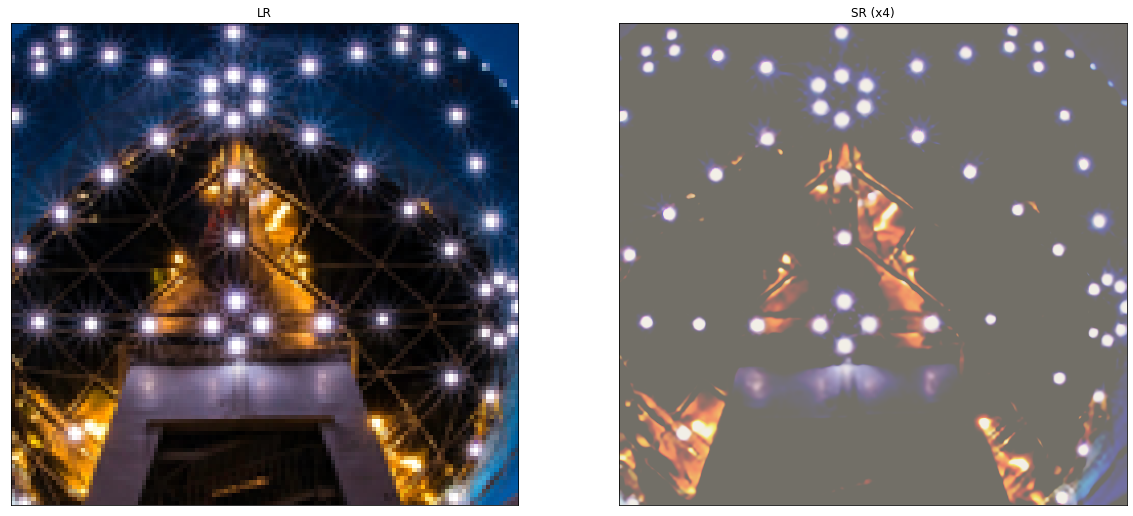

In [18]:
resolve_and_plot('demo/0851x4-crop.png')